In [1]:
# import sys, os.path
# sys.path.insert(0, os.path.join(os.path.dirname(__file__), 'name'))

In [2]:
from src.NN.cartpole_nn import cartpole_nn
from src.collector.runner import runner
from src.collector.collect import cartpole_collect
import numpy as np
import gym
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# # generate training data

# run = runner()
# run.run_times(1000)
# run.save('sv2')

# run.clear()
# run.run_times(100)
# run.save('sv3')


In [4]:
# load data
# data = np.load("cartpole_dataset.npy", allow_pickle=True)
data = np.load("sv2.npy", allow_pickle=True)

train_data = np.array(data[0]['SAs'])
train_goal = np.array(data[0]['dx'])


data2 = np.load("sv3.npy", allow_pickle=True)
test_data = np.array(data2[0]['SAs'])
test_goal = np.array(data2[0]['dx'])

In [5]:
nn = cartpole_nn(train_data, train_goal)

In [6]:
nn.train_model(epochs = 20)

Epoch 1/20
296/296 - 1s - loss: 21.2905 - mse: 21.2905 - val_loss: 0.5990 - val_mse: 0.5990
Epoch 2/20
296/296 - 0s - loss: 0.4175 - mse: 0.4175 - val_loss: 0.4090 - val_mse: 0.4090
Epoch 3/20
296/296 - 0s - loss: 0.2807 - mse: 0.2807 - val_loss: 0.2757 - val_mse: 0.2757
Epoch 4/20
296/296 - 0s - loss: 0.1674 - mse: 0.1674 - val_loss: 0.1346 - val_mse: 0.1346
Epoch 5/20
296/296 - 0s - loss: 0.0731 - mse: 0.0731 - val_loss: 0.0562 - val_mse: 0.0562
Epoch 6/20
296/296 - 0s - loss: 0.0367 - mse: 0.0367 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 7/20
296/296 - 0s - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 8/20
296/296 - 0s - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 9/20
296/296 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 10/20
296/296 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 11/20
296/296 - 0s - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 

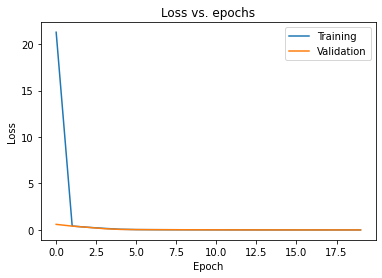

In [7]:
nn.plot()

In [8]:
nn.eval(test_data, test_goal)

61/61 [==============================] - 0s 330us/step - loss: 4.7330e-04 - mse: 4.7330e-04
Error:  0.17888005730541376  %


### Change parameters

In [9]:
# run = runner()
# run.env.change_params(masscart = 1.05)
# run.run_times(100)
# run.save('sv4')

In [10]:
data4 = np.load("sv4.npy", allow_pickle=True)

changed_data = np.array(data4[0]['SAs'])
changed_goal = np.array(data4[0]['dx'])

nn.eval(changed_data, changed_goal)

79/79 [==============================] - 0s 330us/step - loss: 0.3304 - mse: 0.3304
Error:  4.951648281977476  %
